In [1]:
def predict_by_name(model_predict, classes_names):
    for i, v in enumerate(model_predict):
        print(classes_names[i], '\t', str(round(v,5)))

In [2]:
import os
import pandas as pd

base_dir = 'dataset/flowers-recognition_configed'
input_data_dir = {'test':None, 'train':None, 'validation':None}

totalcounter = 0
dfs = {'train':None, 'validation':None, 'test':None}
for i in input_data_dir:
    print(i)
    classes_names = os.listdir(os.path.join(base_dir, i))
    input_data_dir[i] = os.path.join(base_dir, i)
    classes = {}
    for s in classes_names:
        classes[s] = len(os.listdir(os.path.join(base_dir, i, s)))
        
    inputdata = {'flower':None, 'count':None}
    inputdata['flower'] = [f for f, c in classes.items()]
    inputdata['count'] = [c for f, c in classes.items()]
    
    dfs[i] = pd.DataFrame(inputdata)
    totalcounter += dfs[i]['count'].sum()
    print('\t', 'image count mean:', int(dfs[i]['count'].mean()))
    print('\t', 'image count :', int(dfs[i]['count'].sum()))
print('-'.join(['' for i in range(0, 16)]))
print('total image count:', totalcounter)    

class_count = len(classes)

test
	 image count mean: 183
	 image count : 915
train
	 image count mean: 368
	 image count : 1840
validation
	 image count mean: 181
	 image count : 905
---------------
total image count: 3660


In [3]:
def show_model_info(model_h):
    for i, v in model_h['hyper_parameters'].items():
        val = v
        if type(val) == str:
            if 'RMSprop' in v: val = 'RMSprop'
        print(i+':', '\t',val)
    duration = model_h.get('train_duration')
    if duration != None: duration = round(duration/60, 1)
    #print(model_h['history'].model.get_config())
    print('train duration:\t', duration)

In [4]:
import os
import helper as hlp
#from keras import layers
#from keras import models

model_filename = '15781_2_7_3_80_base'
model_h = hlp.load('models/' + model_filename)
print('model file name is:', model_filename)
hlp.show_model_plot(model_h);
show_model_info(model_h)
model_h['history'].model.summary()

Using TensorFlow backend.


model file name is: 15781_2_7_3_80_base


<Figure size 2000x500 with 2 Axes>

image_size: 	 150
batch_size: 	 20
epochs: 	 20
steps_per_epoch: 	 92
validation_steps: 	 46
learning_rate: 	 0.001
optimizer: 	 RMSprop
metrics: 	 ['acc']
train duration:	 1.8
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (N

In [19]:
model_h

{'history': <keras.callbacks.History at 0x28a5db7ee88>,
 'train_duration': 108,
 'hyper_parameters': {'image_size': 150,
  'batch_size': 20,
  'epochs': 20,
  'steps_per_epoch': 92,
  'validation_steps': 46,
  'learning_rate': 0.001,
  'optimizer': '<keras.optimizers.RMSprop object at 0x000002C074D4A208>',
  'metrics': ['acc']}}

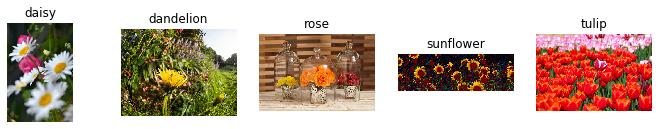

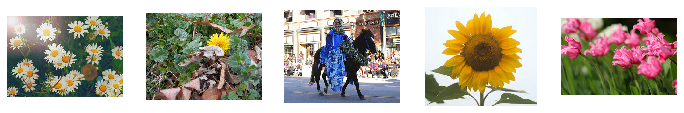

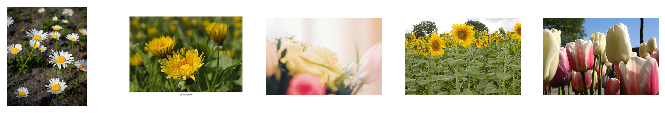

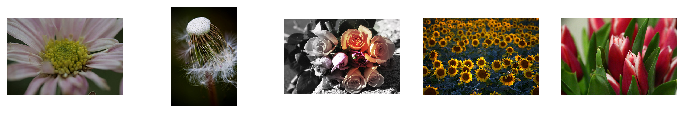

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.figure(figsize=(12,4))
for i, f in enumerate(classes_names):
    sample = os.listdir(os.path.join(input_data_dir['test'], f))[21]
    img = mpimg.imread(os.path.join(input_data_dir['test'], f, sample))
    
    a = fig.add_subplot(2, 5, i + 1)
    imgplot = plt.imshow(img)
    a.set_title(f)
    plt.axis('off')
plt.show()

fig = plt.figure(figsize=(12,4))
for i, f in enumerate(classes_names):
    sample = os.listdir(os.path.join(input_data_dir['test'], f))[28]
    img = mpimg.imread(os.path.join(input_data_dir['test'], f, sample))
    
    a = fig.add_subplot(2, 5, i + 1)
    imgplot = plt.imshow(img)
    plt.axis('off')
plt.show()

fig = plt.figure(figsize=(12,4))
for i, f in enumerate(classes_names):
    sample = os.listdir(os.path.join(input_data_dir['test'], f))[38]
    img = mpimg.imread(os.path.join(input_data_dir['test'], f, sample))
    
    a = fig.add_subplot(2, 5, i + 1)
    imgplot = plt.imshow(img)
    plt.axis('off')
plt.show()

fig = plt.figure(figsize=(12,4))
for i, f in enumerate(classes_names):
    sample = os.listdir(os.path.join(input_data_dir['test'], f))[58]
    img = mpimg.imread(os.path.join(input_data_dir['test'], f, sample))
    
    a = fig.add_subplot(2, 5, i + 1)
    imgplot = plt.imshow(img)
    plt.axis('off')
plt.show()

(1, 150, 150, 3)


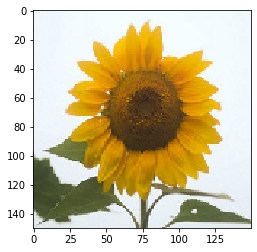

daisy 	 1e-05
dandelion 	 1e-05
rose 	 0.0
sunflower 	 0.99998
tulip 	 0.0


In [21]:
basepath = os.path.join(input_data_dir['test'], 'sunflower')
filenames = os.listdir(basepath)
img_path = os.path.join(basepath, filenames[28])
model = model_h['history'].model

from keras.preprocessing import image
import numpy as np

image_size = model_h['hyper_parameters']['image_size']

img = image.load_img(img_path, target_size=(image_size, image_size))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

p = model.predict(img_tensor)
predict_by_name(p[0], classes_names)

(1, 148, 148, 16)


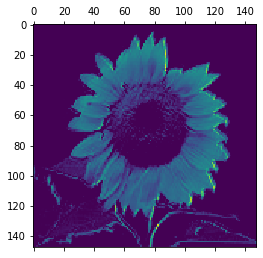

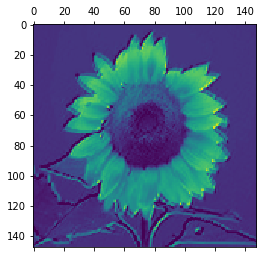

In [22]:
from keras import models

layer_outputs = [layer.get_output_at(0) for layer in model.layers[0:8]]
#layer_outputs = [models.get_output_at(i) for i in range(0,9)]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)

plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

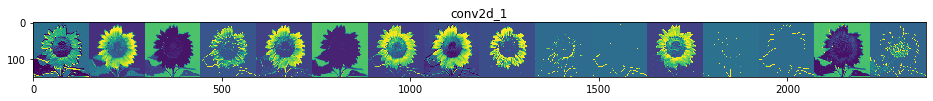

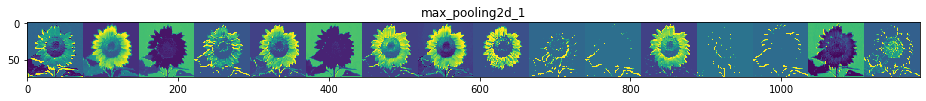

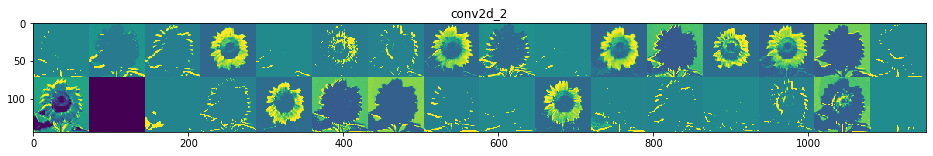

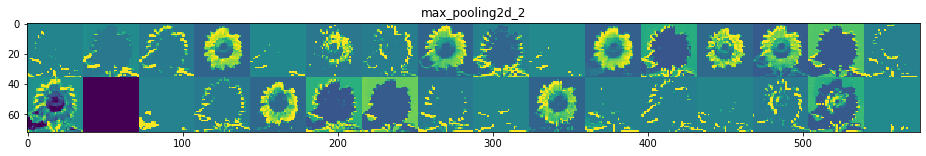

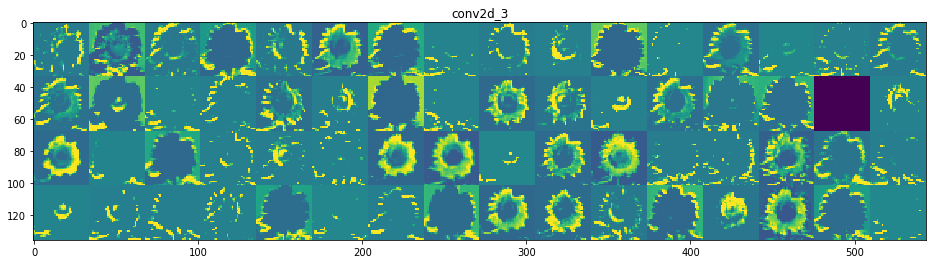

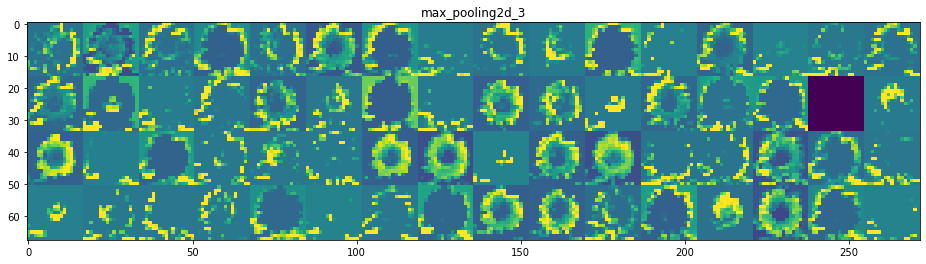

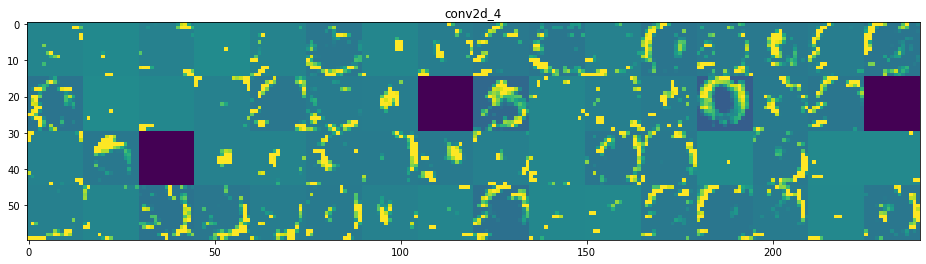

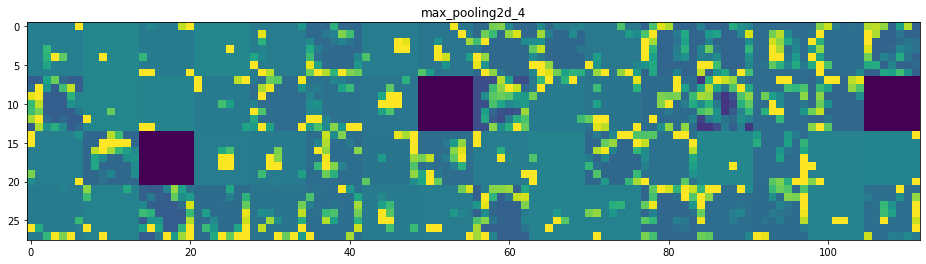

In [23]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    
    size = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                            :, :,
                                            col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')       

In [24]:
model.layers